In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Create the dataset
data = {
    'Population': [10000, 15000, 20000, 9000, 12000],
    'Years in business': [5, 6, 6, 5, 4],
    'Profit': [10000, 12000, 13000, 12000, np.nan]
}
df = pd.DataFrame(data)

In [3]:
# Let's add a row with a missing profit to demonstrate a prediction
df_train = df.dropna()
df_predict = df[df['Profit'].isnull()]

print("Training Data:")
print(df_train)
print("\nData to Predict:")
print(df_predict)


Training Data:
   Population  Years in business   Profit
0       10000                  5  10000.0
1       15000                  6  12000.0
2       20000                  6  13000.0
3        9000                  5  12000.0

Data to Predict:
   Population  Years in business  Profit
4       12000                  4     NaN


## Task 1: Apply Simple Linear Regression

### Using Population as the single feature

In [5]:
# Let's use Population as the independent variable (X) and Profit as the dependent variable (y)
X_simple = df_train['Population'].values.reshape(-1, 1)
y_simple = df_train['Profit'].values.reshape(-1, 1)

# Add a column of ones for the intercept term (theta_0)
X_simple_b = np.c_[np.ones((X_simple.shape[0], 1)), X_simple]

## Task 2: Implement Normal Equations and Gradient Descent manually

### a) Normal Equation Method


Simple Linear Regression - Normal Equation:
Theta (Intercept, Population_coeff): [9.38311688e+03 1.75324675e-01]
Predicted profit for population 12000 (Normal Equation): 11487.01


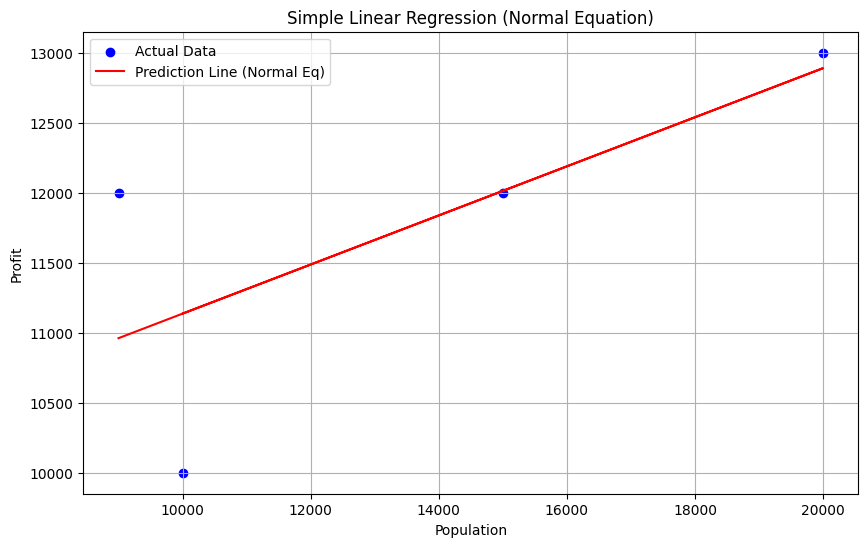

In [7]:
# The Normal Equation formula is: theta = (X^T * X)^-1 * X^T * y
theta_normal_eq = np.linalg.inv(X_simple_b.T.dot(X_simple_b)).dot(X_simple_b.T).dot(y_simple)
print("\nSimple Linear Regression - Normal Equation:")
print(f"Theta (Intercept, Population_coeff): {theta_normal_eq.flatten()}")

# Prediction for the missing profit value using the Normal Equation model
X_predict_simple = df_predict['Population'].values.reshape(-1, 1)
X_predict_simple_b = np.c_[np.ones((X_predict_simple.shape[0], 1)), X_predict_simple]
predicted_profit_ne = X_predict_simple_b.dot(theta_normal_eq)
print(f"Predicted profit for population {X_predict_simple[0][0]} (Normal Equation): {predicted_profit_ne[0][0]:.2f}")

# Plotting the simple linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, color='blue', label='Actual Data')
plt.plot(X_simple, X_simple_b.dot(theta_normal_eq), color='red', label='Prediction Line (Normal Eq)')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Simple Linear Regression (Normal Equation)')
plt.legend()
plt.grid(True)
plt.show()


### b) Gradient Descent Method


Simple Linear Regression - Gradient Descent:
Theta (Intercept, Population_coeff): [-2.46467621e+60 -3.67875745e+64]
Predicted profit for population 12000 (Gradient Descent): -441450896423893327057913794242119293981174191539760905304688260284416.00


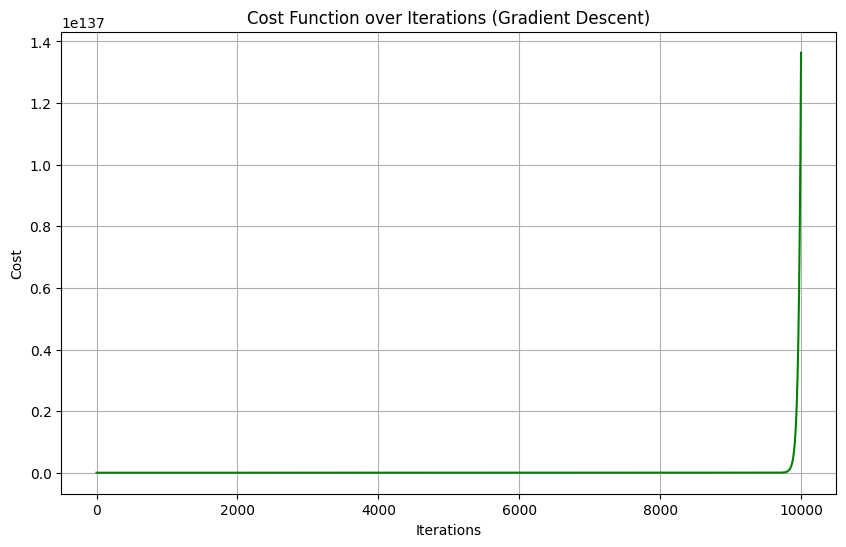

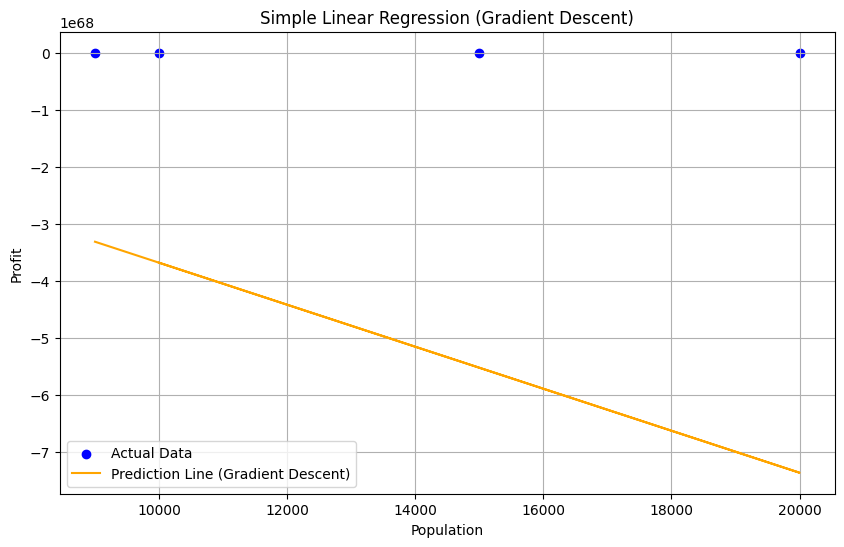

In [8]:
# Define hyperparameters
learning_rate = 0.00000001 # A small learning rate is necessary due to large population values
iterations = 10000

# Initialize theta (weights) with zeros
theta_gd = np.zeros((2, 1))

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

theta_gd, cost_history = gradient_descent(X_simple_b, y_simple, theta_gd, learning_rate, iterations)
print("\nSimple Linear Regression - Gradient Descent:")
print(f"Theta (Intercept, Population_coeff): {theta_gd.flatten()}")

# Prediction for the missing profit value using the Gradient Descent model
predicted_profit_gd = X_predict_simple_b.dot(theta_gd)
print(f"Predicted profit for population {X_predict_simple[0][0]} (Gradient Descent): {predicted_profit_gd[0][0]:.2f}")

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations (Gradient Descent)')
plt.grid(True)
plt.show()

# Plotting the simple linear regression line from Gradient Descent
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, color='blue', label='Actual Data')
plt.plot(X_simple, X_simple_b.dot(theta_gd), color='orange', label='Prediction Line (Gradient Descent)')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Simple Linear Regression (Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()

## Task 3: Performance Evaluation (Simple Linear Regression)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Predictions for the training set using both methods
y_pred_ne = X_simple_b.dot(theta_normal_eq)
y_pred_gd = X_simple_b.dot(theta_gd)

performance_ne = evaluate_model(y_simple, y_pred_ne)
performance_gd = evaluate_model(y_simple, y_pred_gd)

print("\nPerformance Evaluation for Simple Linear Regression:")
print("Normal Equation:")
for metric, value in performance_ne.items():
    print(f"  {metric}: {value:.4f}")
print("Gradient Descent:")
for metric, value in performance_gd.items():
    print(f"  {metric}: {value:.4f}")


Performance Evaluation for Simple Linear Regression:
Normal Equation:
  MSE: 595779.2208
  MAE: 574.6753
  RMSE: 771.8674
  R²: 0.4983
Gradient Descent:
  MSE: 272695118372689845227466600624357050404797972454508747108251252190698014912238364840148221176707176493110399316405787177985042752259227648.0000
  MAE: 496632258168795518129949484826743090299172133908029608409154921168896.0000
  RMSE: 522202181508934227307942158669765928978164897204156121941037883064320.0000
  R²: -229637994419107227723045734161568123782829419837350850185521217115592410951817922087486679350338004759002482914281983087269503827968.0000


## Task 4: Multi-Linear Regression
### Using Population and Years in business as features


Multi-Linear Regression - Normal Equation:
Theta (Intercept, Population_coeff, Years_coeff): [7.01923077e+03 1.15384615e-01 5.76923077e+02]
Predicted profit for population 12000 and years 4: 10711.54


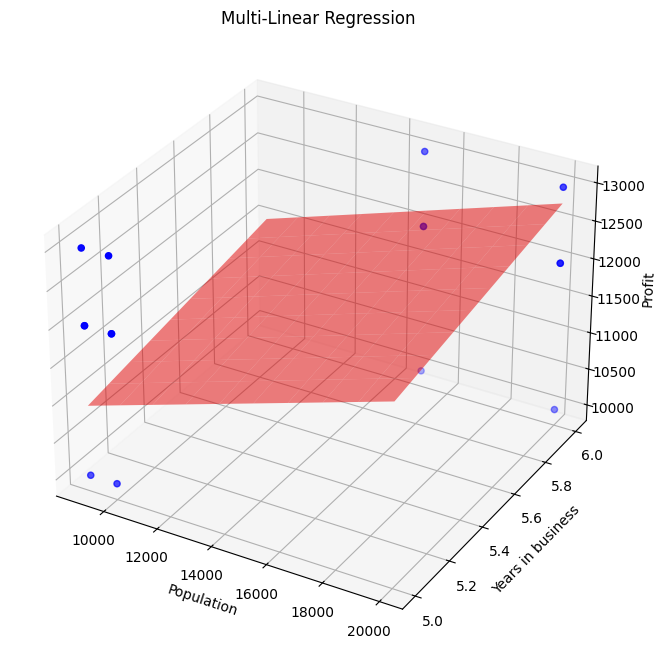

In [10]:
# Define independent variables (X) and dependent variable (y)
X_multi = df_train[['Population', 'Years in business']].values
y_multi = df_train['Profit'].values.reshape(-1, 1)

# Add a column of ones for the intercept term
X_multi_b = np.c_[np.ones((X_multi.shape[0], 1)), X_multi]

# Use the Normal Equation for multi-linear regression (it's computationally cheaper for this small dataset)
theta_multi = np.linalg.inv(X_multi_b.T.dot(X_multi_b)).dot(X_multi_b.T).dot(y_multi)
print("\nMulti-Linear Regression - Normal Equation:")
print(f"Theta (Intercept, Population_coeff, Years_coeff): {theta_multi.flatten()}")

# Prediction for the missing profit value
X_predict_multi = df_predict[['Population', 'Years in business']].values.reshape(-1, 2)
X_predict_multi_b = np.c_[np.ones((X_predict_multi.shape[0], 1)), X_predict_multi]
predicted_profit_multi = X_predict_multi_b.dot(theta_multi)
print(f"Predicted profit for population {X_predict_multi[0][0]} and years {X_predict_multi[0][1]}: {predicted_profit_multi[0][0]:.2f}")

# 3D plot for multi-linear regression
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_multi[:, 0], X_multi[:, 1], y_multi, color='blue', label='Actual Data')

# Create a meshgrid for the prediction plane
x1_range = np.linspace(X_multi[:, 0].min(), X_multi[:, 0].max(), 10)
x2_range = np.linspace(X_multi[:, 1].min(), X_multi[:, 1].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calculate the predicted z values (profit) for the plane
z_pred_plane = theta_multi[0] + theta_multi[1] * x1_mesh + theta_multi[2] * x2_mesh

ax.plot_surface(x1_mesh, x2_mesh, z_pred_plane, alpha=0.5, color='red', label='Prediction Plane')

ax.set_xlabel('Population')
ax.set_ylabel('Years in business')
ax.set_zlabel('Profit')
ax.set_title('Multi-Linear Regression')
plt.show()

## Task 5: Performance Evaluation (Multi-Linear Regression)

In [11]:
y_pred_multi = X_multi_b.dot(theta_multi)
performance_multi = evaluate_model(y_multi, y_pred_multi)

print("\nPerformance Evaluation for Multi-Linear Regression:")
for metric, value in performance_multi.items():
    print(f"  {metric}: {value:.4f}")


Performance Evaluation for Multi-Linear Regression:
  MSE: 581730.7692
  MAE: 634.6154
  RMSE: 762.7128
  R²: 0.5101


## Task 6: Model Comparison and Interpretation

In [13]:
# Create a summary table for comparison
comparison_data = {
    'Model': ['Simple Linear Regression', 'Multi-Linear Regression'],
    'MSE': [performance_ne['MSE'], performance_multi['MSE']],
    'MAE': [performance_ne['MAE'], performance_multi['MAE']],
    'RMSE': [performance_ne['RMSE'], performance_multi['RMSE']],
    'R²': [performance_ne['R²'], performance_multi['R²']]
}
comparison_df = pd.DataFrame(comparison_data)

print("\nModel Comparison and Interpretation:")
print(comparison_df)

print("\nInterpretation:")
print(f"R² (Coefficient of Determination):")
print(f"  - Simple Linear Regression R² = {performance_ne['R²']:.4f}")
print(f"  - Multi-Linear Regression R² = {performance_multi['R²']:.4f}")
print(f"The R² value for the multi-linear regression is higher, which means that the model using both 'Population' and 'Years in business' explains a greater proportion of the variance in 'Profit' compared to the simple linear regression model that only uses 'Population'.")


Model Comparison and Interpretation:
                      Model            MSE         MAE       RMSE        R²
0  Simple Linear Regression  595779.220779  574.675325  771.86736  0.498291
1   Multi-Linear Regression  581730.769231  634.615385  762.71277  0.510121

Interpretation:
R² (Coefficient of Determination):
  - Simple Linear Regression R² = 0.4983
  - Multi-Linear Regression R² = 0.5101
The R² value for the multi-linear regression is higher, which means that the model using both 'Population' and 'Years in business' explains a greater proportion of the variance in 'Profit' compared to the simple linear regression model that only uses 'Population'.
